In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#1.Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.Evaluation
#6.Improvement 
#7.Website
#8.Deployment

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
#renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [8]:
df.sample(5)

,Target,Text
1697,ham,Hai priya are you right. What doctor said pa. ...
3452,ham,Nowadays people are notixiquating the laxinorf...
5474,ham,Where's mummy's boy ? Is he being good or bad ...
5356,ham,Tell me something. Thats okay.
5370,spam,dating:i have had two of these. Only started a...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Target']=encoder.fit_transform(df['Target'])

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
#check for duplicated values
df.duplicated().sum()

np.int64(403)

In [14]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

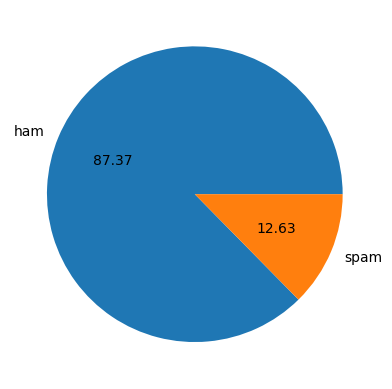

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_characters']=df['Text'].apply(len)

In [23]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# Fetch number of words
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,Target,Text,num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.describe()

,Target,num_characters,Num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [28]:
df[df['Target']==0][['num_characters','Num_words','num_sentences']].describe()   #Ham Messages

,num_characters,Num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['Target']==1][['num_characters','Num_words','num_sentences']].describe()   #Spam Messages

,num_characters,Num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


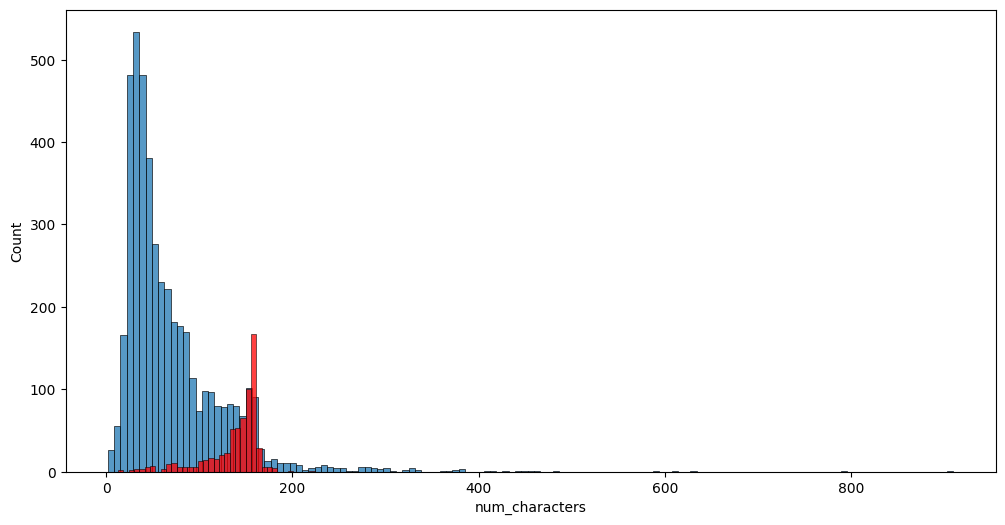

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])     #Ham    
sns.histplot(df[df['Target']== 1]['num_characters'],color='red')    #Spam
plt.show()

<Axes: xlabel='Num_words', ylabel='Count'>

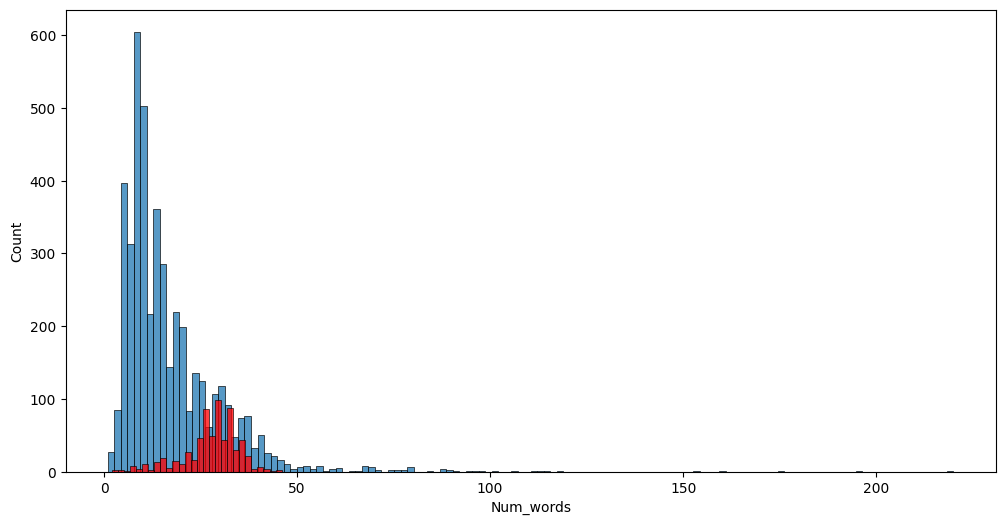

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['Num_words'])     #Ham    
sns.histplot(df[df['Target']== 1]['Num_words'],color='red')    #Spam

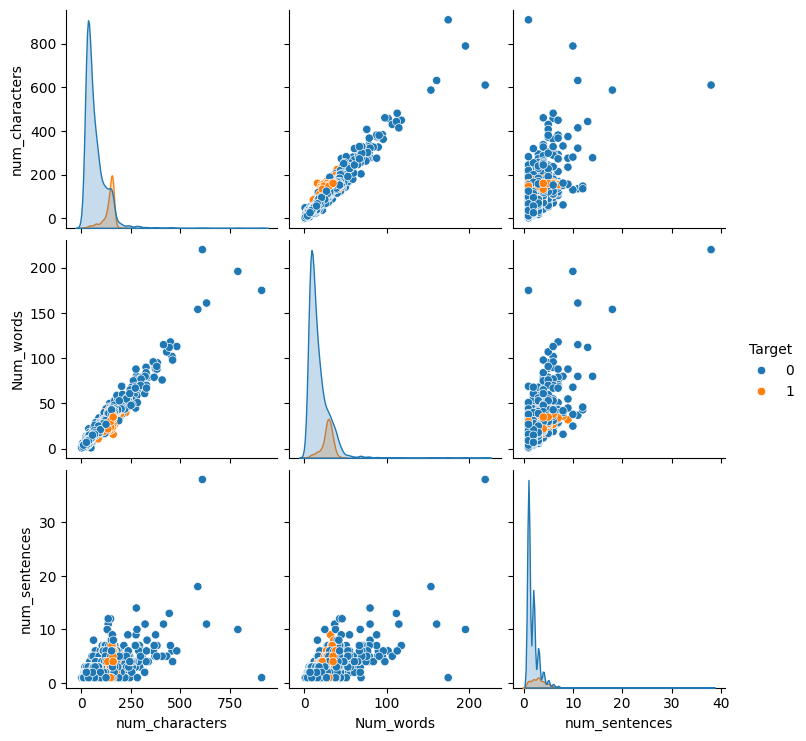

In [32]:
sns.pairplot(df,hue='Target')

<Axes: >

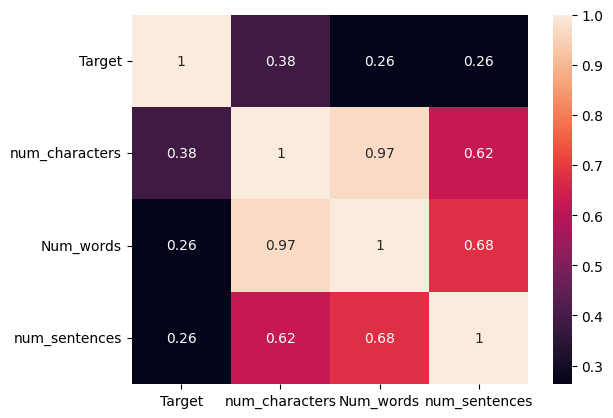

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data Preprocessing
### 1. Lower Case
### Tokenization
### Removing Special Characters
### Removing stop words and punctuation
### Stemming

In [34]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()                       #Lowering
    text=nltk.word_tokenize(text)           #Tokenize

    y=[]                                    #Removing Special Character
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]                               #Removing Stopwords and Punctuation
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]                               #Stemming
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [35]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams senu the gendu dog')

'okay name ur price long legal wen pick u ave x am senu gendu dog'

In [ ]:
df['Transformed_Text']=df['Text'].apply(transform_text)

In [ ]:
df.head()

,Target,Text,num_characters,Num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

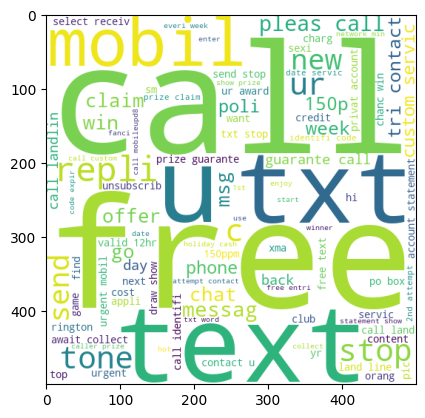

In [ ]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))
plt.imshow(spam_wc)

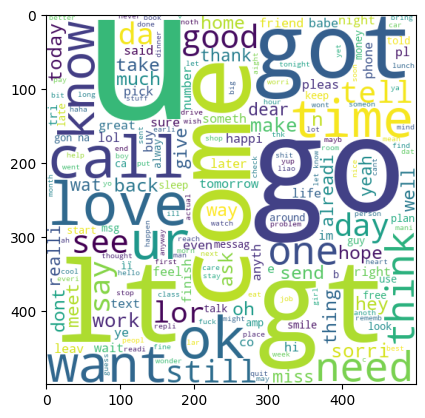

In [ ]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

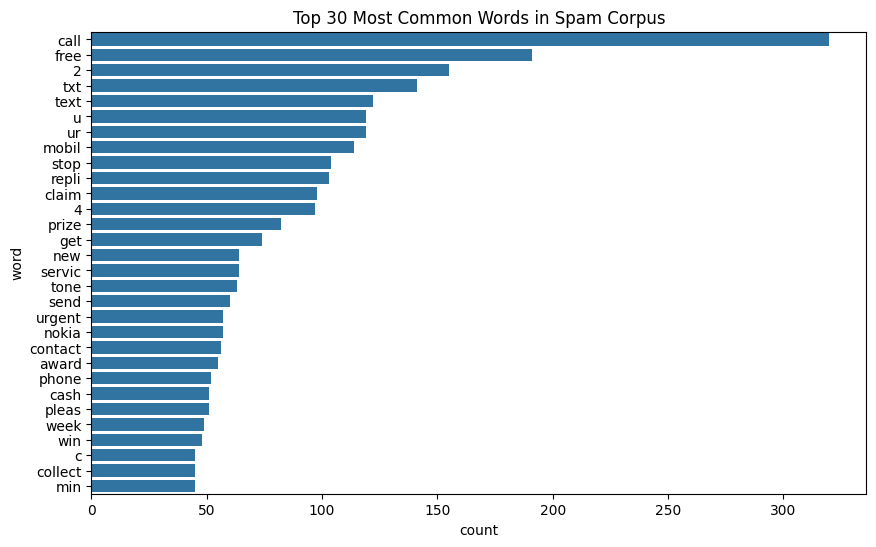

In [ ]:
from collections import Counter

# Get top 30 most common words in the corpus
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

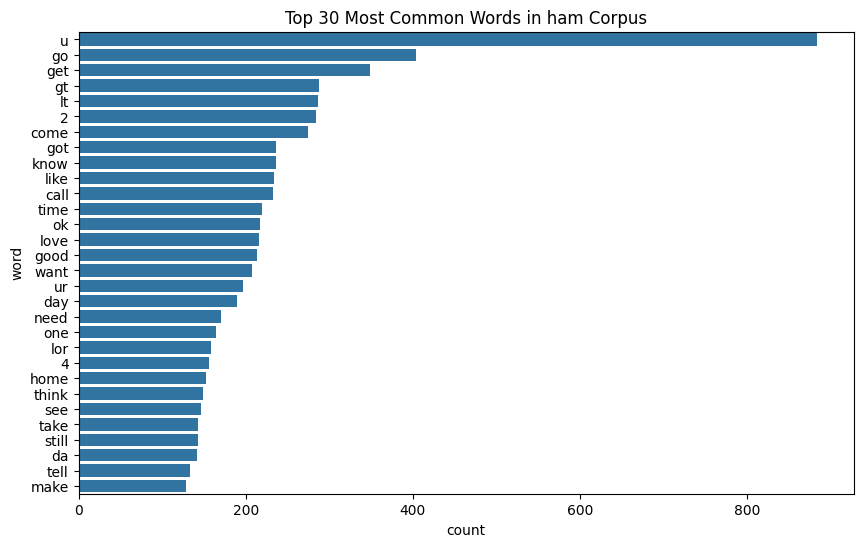

In [ ]:
# Get top 30 most common words in the corpus
top_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in ham Corpus")
plt.show()


## Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=300)

In [ ]:
X=tfidf.fit_transform(df['Transformed_Text']).toarray()

In [ ]:
X.shape

(5169, 300)

In [ ]:
y=df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))



0.6547388781431335
0.27234927234927236
[[546 350]
 [  7 131]]


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9622823984526112
0.9304347826086956
[[888   8]
 [ 31 107]]


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.971953578336557
0.943089430894309
[[889   7]
 [ 22 116]]


In [ ]:
#tfidf---> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9613152804642167
Precision -  0.9298245614035088
For  KN
Accuracy -  0.9439071566731141
Precision -  0.9651162790697675
For  NB
Accuracy -  0.9622823984526112
Precision -  0.9304347826086956
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8317757009345794
For  LR
Accuracy -  0.9632495164410058
Precision -  0.9385964912280702
For  RF
Accuracy -  0.9632495164410058
Precision -  0.9098360655737705
For  AdaBoost
Accuracy -  0.9177949709864603
Precision -  0.8732394366197183
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9649122807017544


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.943907,0.965116
10,xgb,0.969052,0.964912
4,LR,0.963250,0.938596
9,GBDT,0.950677,0.930693
2,NB,0.962282,0.930435
0,SVC,0.961315,0.929825
8,ETC,0.967118,0.926230
5,RF,0.963250,0.909836
6,AdaBoost,0.917795,0.873239
7,BgC,0.958414,0.862595


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.943907
1,xgb,Accuracy,0.969052
2,LR,Accuracy,0.963250
3,GBDT,Accuracy,0.950677
4,NB,Accuracy,0.962282
5,SVC,Accuracy,0.961315
6,ETC,Accuracy,0.967118
7,RF,Accuracy,0.963250
8,AdaBoost,Accuracy,0.917795
9,BgC,Accuracy,0.958414


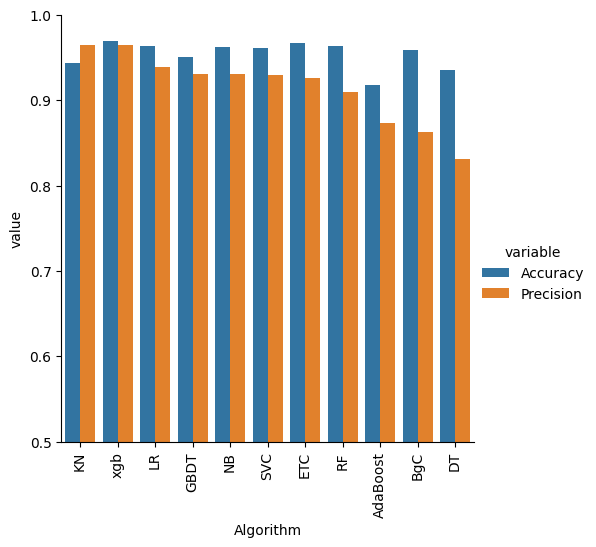

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.943907,0.965116,0.943907,0.965116,0.943907,0.965116,0.943907,0.965116
1,xgb,0.969052,0.964912,0.969052,0.964912,0.969052,0.964912,0.969052,0.964912
2,LR,0.963250,0.938596,0.963250,0.938596,0.963250,0.938596,0.963250,0.938596
3,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
4,NB,0.962282,0.930435,0.962282,0.930435,0.962282,0.930435,0.962282,0.930435
5,SVC,0.961315,0.929825,0.961315,0.929825,0.961315,0.929825,0.961315,0.929825
6,ETC,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,RF,0.963250,0.909836,0.963250,0.909836,0.963250,0.909836,0.963250,0.909836
8,AdaBoost,0.917795,0.873239,0.917795,0.873239,0.917795,0.873239,0.917795,0.873239
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [ ]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9642166344294004
Precision 0.9316239316239316


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.965183752417795
Precision 0.9180327868852459
